# Exploratory Data Analysis

## Importing libraries

In [1]:
#Import libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


Now, let's dive into each dataset:

## Product sale Dataset

In [66]:
product_df_raw = pd.read_csv('/content/drive/MyDrive/Analytics/Datasets/product_sales_sample.csv')
product_df_raw

,Rest Owner,Rest Coop,REST_KEY,MITM_KEY,Menu Item,Menu Item Combo Meal Flag,Reporting Day,POS Consumer Price,POS Total Units Sold Promo and Regular,POS Promotion Units Sold,POS Units Sold,POS Combo Units Sold
0,SMITH JOE,SEA/TCA WA CP-0024,1364,1,00000001-REUBEN,N,1/1/11,0.95,25,0,25,6
1,SMITH JOE,SEA/TCA WA CP-0024,5357,1,00000001-REUBEN,N,1/1/11,0.95,10,0,10,1
2,SMITH JOE,SEA/TCA WA CP-0024,13369,1,00000001-REUBEN,N,1/1/11,0.95,9,0,9,3
3,SMITH JOE,SEA/TCA WA CP-0024,13604,1,00000001-REUBEN,N,1/1/11,0.95,24,0,24,4
4,SMITH JOE,SEA/TCA WA CP-0024,1364,1,00000001-REUBEN,N,1/2/11,0.95,28,0,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6511,SMITH JOE,SEA/TCA WA CP-0024,13369,134,00000134-SML ICED CRML MOCHA,N,1/24/11,2.35,2,0,2,0
6512,SMITH JOE,SEA/TCA WA CP-0024,13369,134,00000134-SML ICED CRML MOCHA,N,1/25/11,2.35,1,0,1,0
6513,SMITH JOE,SEA/TCA WA CP-0024,5357,134,00000134-SML ICED CRML MOCHA,N,1/27/11,2.35,1,0,1,0
6514,SMITH JOE,SEA/TCA WA CP-0024,13369,134,00000134-SML ICED CRML MOCHA,N,1/29/11,2.35,2,0,2,0


In [4]:
product_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rest Owner                               6516 non-null   object 
 1   Rest Coop                                6516 non-null   object 
 2   REST_KEY                                 6516 non-null   int64  
 3   MITM_KEY                                 6516 non-null   int64  
 4   Menu Item                                6516 non-null   object 
 5   Menu Item Combo Meal Flag                6516 non-null   object 
 6   Reporting Day                            6516 non-null   object 
 7   POS Consumer Price                       6502 non-null   float64
 8   POS Total Units Sold  Promo and Regular  6516 non-null   int64  
 9   POS Promotion Units Sold                 6516 non-null   int64  
 10  POS Units Sold                           6516 no

In [5]:
print(product_df_raw.isnull().sum())

Rest Owner                                  0
Rest Coop                                   0
REST_KEY                                    0
MITM_KEY                                    0
Menu Item                                   0
Menu Item Combo Meal Flag                   0
Reporting Day                               0
POS Consumer Price                         14
POS Total Units Sold  Promo and Regular     0
POS Promotion Units Sold                    0
POS Units Sold                              0
POS Combo Units Sold                        0
dtype: int64


We see that "Pos Consumer Price" has 14 null values, so we address this issue:

In [6]:
#Total of null values in Pos Consumer Price column
null_values_pcp = product_df_raw['POS Consumer Price'].isnull().sum()

#Total of number values in Pos Consumer Price column
total_values_pcp = product_df_raw['POS Consumer Price'].count() + null_values_pcp

#Proportion of null values in Pos Consumer Price column

null_proportion_pcp = (null_values_pcp / total_values_pcp) * 100

print(f"The proportion of null values in the column 'POS Consumer Price' is {null_proportion_pcp:.2f}%")

The proportion of null values in the column 'POS Consumer Price' is 0.21%


Now, with a proportion of only 0.21% we can make a mean imputation in the POS Consumer Price column like this:

In [7]:
mean_value = product_df_raw['POS Consumer Price'].mean()
product_df_raw['POS Consumer Price'].fillna(mean_value, inplace=True)

In [8]:
print(product_df_raw.isnull().sum())

Rest Owner                                 0
Rest Coop                                  0
REST_KEY                                   0
MITM_KEY                                   0
Menu Item                                  0
Menu Item Combo Meal Flag                  0
Reporting Day                              0
POS Consumer Price                         0
POS Total Units Sold  Promo and Regular    0
POS Promotion Units Sold                   0
POS Units Sold                             0
POS Combo Units Sold                       0
dtype: int64


So, finally we have addressed the null values in all the columns!

Now, we are going to examine the unique values (how do we determine the relevant features):

In [9]:
#Unique values in the dataset:
columns_with_single_unique_value = []

for column in product_df_raw.columns:
    unique_values_1 = product_df_raw[column].unique()
    num_unique_values_1 = len(unique_values_1)

    if num_unique_values_1 == 1:
      columns_with_single_unique_value.append(column)

    print(f"Column '{column}' has {num_unique_values_1} unique values: {unique_values_1}\n")

print("Columns with only 1 unique value:", columns_with_single_unique_value)

Column 'Rest Owner' has 1 unique values: ['SMITH JOE']

Column 'Rest Coop' has 1 unique values: ['SEA/TCA WA CP-0024']

Column 'REST_KEY' has 4 unique values: [ 1364  5357 13369 13604]

Column 'MITM_KEY' has 38 unique values: [  1   2   3   4   5   7  24  30  31  32  33  34  35  46  50  51  60  61
  62  64  66  78  79  80  81  83  85  92 107 111 113 119 121 127 128 129
 133 134]

Column 'Menu Item' has 38 unique values: ['00000001-REUBEN' '00000002-DOUBLE REUBEN' '00000003-PASTRAMI'
 '00000004-DOUBLE PASTRAMI' '00000005-SUPER BISTRO'
 '00000007- FRENCH CHEESE' '00000024-SML COFFEE' '00000030-SCRAMBLED EGGS'
 '00000031-HOTCAKES' '00000032-HOTCAKES & SAUSAGE' '00000033-SAUSAGE'
 '00000034-ENGLISH MUFFIN' '00000035-HASH BROWN' '00000046-EGG SANDWICH'
 '00000050-SML UNSWEET ICED TEA' '00000051-BIG BEEF BUN'
 '00000060-6 TATER TOTS' '00000061-20 TATER TOTS'
 '00000062-SAUSAGE BISCUIT' '00000064-BISCUIT' '00000066-MILK'
 '00000078-SAUSAGE MUFFIN' '00000079-CHD UNSWEET ICED TEA'
 '00000080-ME

**Note:** Also, we can see that MITM_Key is an internal identifier.
So, from the Product Sales dataset: 'Rest Owner', 'MITM_Key' and 'Rest Coop' columns could be removed due their lack of relevance.

In [10]:
#Deleting our irrelevant columns:
product_data_df = product_df_raw.drop(columns=['Rest Owner','MITM_KEY','Rest Coop'])

product_data_df.columns = [x.strip() for x in product_data_df.columns]
product_data_df.columns = [x.replace('  ', ' ') for x in product_data_df.columns]

In [11]:
#Out treated dataset:
product_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REST_KEY                                6516 non-null   int64  
 1   Menu Item                               6516 non-null   object 
 2   Menu Item Combo Meal Flag               6516 non-null   object 
 3   Reporting Day                           6516 non-null   object 
 4   POS Consumer Price                      6516 non-null   float64
 5   POS Total Units Sold Promo and Regular  6516 non-null   int64  
 6   POS Promotion Units Sold                6516 non-null   int64  
 7   POS Units Sold                          6516 non-null   int64  
 8   POS Combo Units Sold                    6516 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 458.3+ KB


We can start evaluating the POS Promotion Units Sold, to see the number of exclusively promotional units sold

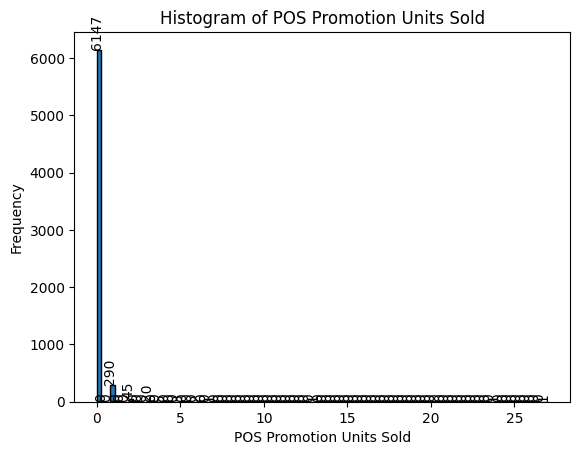

In [12]:
#Histogram:
data_pos_u = product_data_df['POS Promotion Units Sold']

counts, bins = np.histogram(data_pos_u, bins=100)

# Histogram settings and plotting
plt.hist(data_pos_u, bins=100, edgecolor='black')
for count, x in zip(counts, bins):
    plt.text(x, count, str(count), ha='center', va='bottom', rotation=90, fontsize=10)

plt.xlabel('POS Promotion Units Sold')
plt.ylabel('Frequency')
plt.title('Histogram of POS Promotion Units Sold')
plt.show()

Which means that approximately 94.34% of values from our POS Promotion Units Sold is 0. This could be considered as irrelevant, but we do not exclude it from our dataset.

Now, we will treat some format adjustments:

In [13]:
#Ensuring that our date has a correct datetime format
product_data_df['Reporting Day'] = pd.to_datetime(product_data_df['Reporting Day'])

<ipython-input-13-a109b7148df7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_data_df['Reporting Day'] = pd.to_datetime(product_data_df['Reporting Day'])


In [14]:
#Extracting the day from the Reporting Date column:
product_data_df['day'] = product_data_df['Reporting Day'].dt.day

**Important:**
1. We can consider that the column 'POS Total Units Sold Promo and Regular' could give us a complete information about the net sales in our business.
2. As this is a dataset including information just for one month, we will focus our attention analyzing the behavior per days. We could consider per weeks, but a variation per days could be more ilustrative to see which days could show some patterns.

So, we will work with the variables: 'POS Total Units Sold Promo and Regular'  and 'day'

In [15]:
#Grouping and summing the 'POS Total Units Sold Promo and Regular' per day:
grouped_df_pos_total = product_data_df[['day', 'POS Total Units Sold Promo and Regular']].groupby('day').sum()

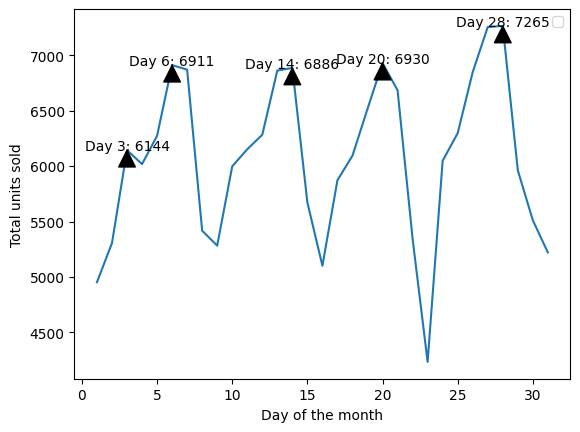

In [16]:
from scipy.signal import find_peaks
# Identifying the peaks
peaks, _ = find_peaks(grouped_df_pos_total['POS Total Units Sold Promo and Regular'])

# Plotting our grouped_df_pos_total:

ax = grouped_df_pos_total.plot()
for peak in peaks:
    day = grouped_df_pos_total.index[peak]
    total_units_sold = grouped_df_pos_total.iloc[peak]['POS Total Units Sold Promo and Regular']
    ax.annotate(f'Day {day}: {total_units_sold}', xy=(day, total_units_sold), xytext=(day, total_units_sold + 1),
                ha='center', arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Day of the month')
plt.ylabel('Total units sold')
plt.legend('')
plt.show()

**Observations:**

- Sales display a weekly seasonal pattern.
- Sales seems to be stationary.

Now, if we want to evaluate hwo was the total units selling per each store, we need to see the variable 'REST_KEY' which is an identifier of each store (all ubicated in the same town, because of the regional ID).

To do this, we could make a **simple encoder** for the stores according with their keys:

In [17]:
#Encoding the variable 'REST_KEY' for readability and replication:

# Define the mapping dictionary
mapping_dict = {
    1364: 'Store1',
    5357: 'Store2',
    13369: 'Store3',
    13604: 'Store4'
}

# Use the dictionary to transform the REST_KEY column
encoded_rest_key = product_data_df['REST_KEY'].map(mapping_dict)

product_data_df['Encoded_REST_KEY'] = encoded_rest_key

# Display the encoded REST_KEY column
print("Encoded REST_KEY Column:")
print(encoded_rest_key)

Encoded REST_KEY Column:
0       Store1
1       Store2
2       Store3
3       Store4
4       Store1
         ...  
6511    Store3
6512    Store3
6513    Store2
6514    Store3
6515    Store3
Name: REST_KEY, Length: 6516, dtype: object


In [18]:
product_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   REST_KEY                                6516 non-null   int64         
 1   Menu Item                               6516 non-null   object        
 2   Menu Item Combo Meal Flag               6516 non-null   object        
 3   Reporting Day                           6516 non-null   datetime64[ns]
 4   POS Consumer Price                      6516 non-null   float64       
 5   POS Total Units Sold Promo and Regular  6516 non-null   int64         
 6   POS Promotion Units Sold                6516 non-null   int64         
 7   POS Units Sold                          6516 non-null   int64         
 8   POS Combo Units Sold                    6516 non-null   int64         
 9   day                                     6516 non-nul

In [19]:
grouped_df_pd = product_data_df[['Encoded_REST_KEY', 'day',
                'POS Total Units Sold Promo and Regular']].groupby(['Encoded_REST_KEY','day']).sum()

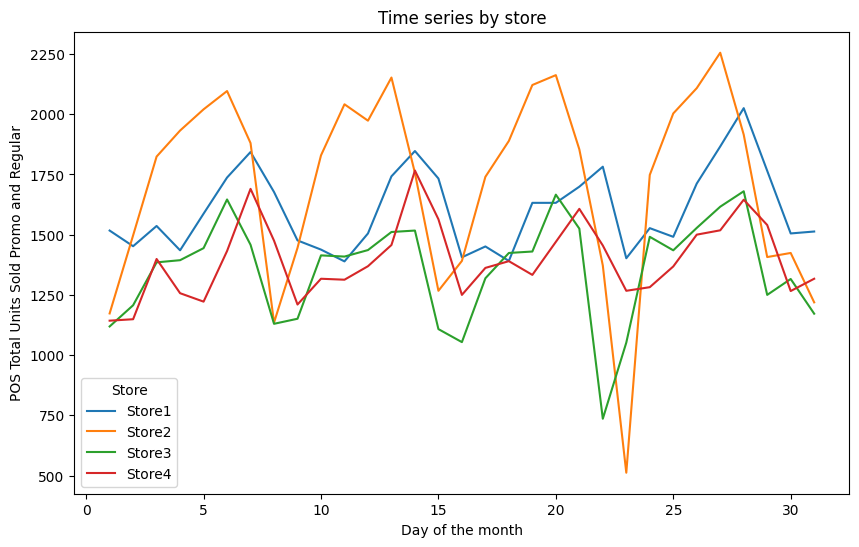

In [20]:
grouped_df_pd.reset_index(inplace=True)

plt.figure(figsize=(10, 6))

for category, group in grouped_df_pd.groupby('Encoded_REST_KEY'):
    plt.plot(group['day'], group['POS Total Units Sold Promo and Regular'], label=category)

plt.xlabel('Day of the month')
plt.ylabel('POS Total Units Sold Promo and Regular')
plt.title('Time series by store')
plt.legend(title='Store')
plt.show()

In [21]:
product_data_df['DayOfWeek'] = product_data_df['Reporting Day'].dt.day_name()

And now, evaluating the total units sold by day of the week:

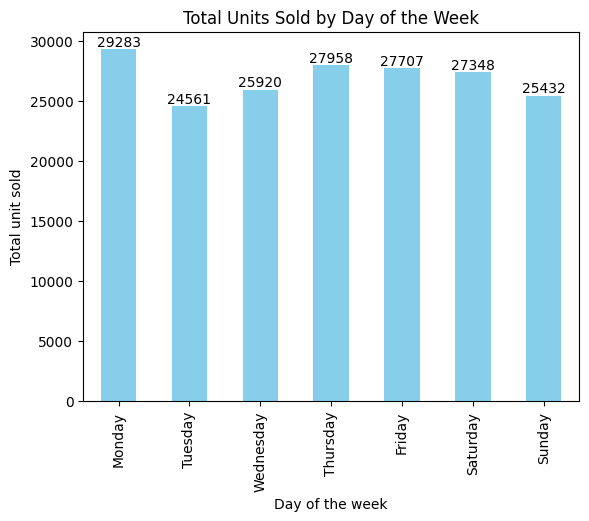

In [22]:
dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday']

sales_by_day = product_data_df.groupby('DayOfWeek')['POS Total Units Sold Promo and Regular'].sum().reindex(dow)

ax = sales_by_day.plot(kind='bar', color='skyblue')
plt.ylabel('Total unit sold')
plt.xlabel('Day of the week')
plt.title('Total Units Sold by Day of the Week')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

To see the variation from each day of the week in terms of POS Total units sold:

<Axes: xlabel='DayOfWeek', ylabel='POS Total Units Sold Promo and Regular'>

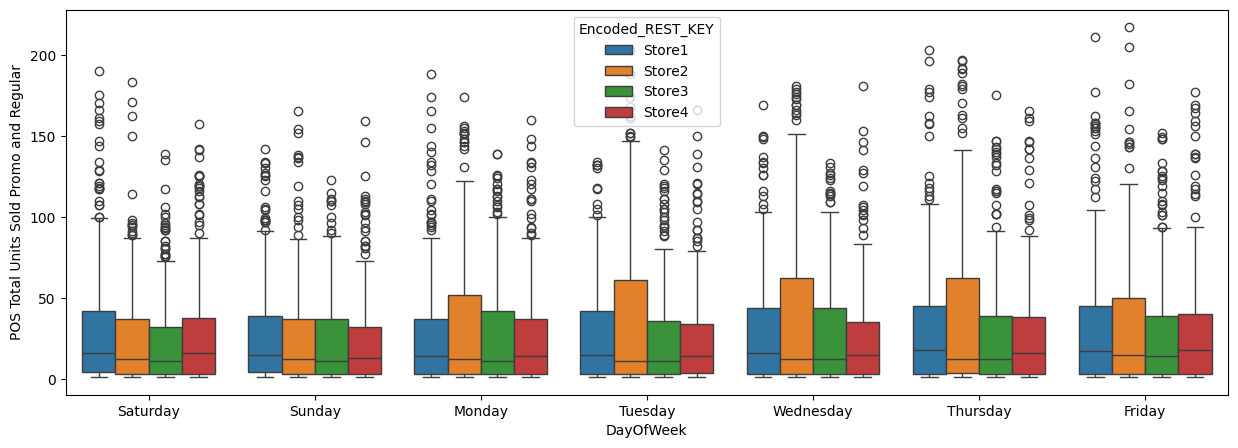

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=product_data_df, x='DayOfWeek', y='POS Total Units Sold Promo and Regular', hue='Encoded_REST_KEY')

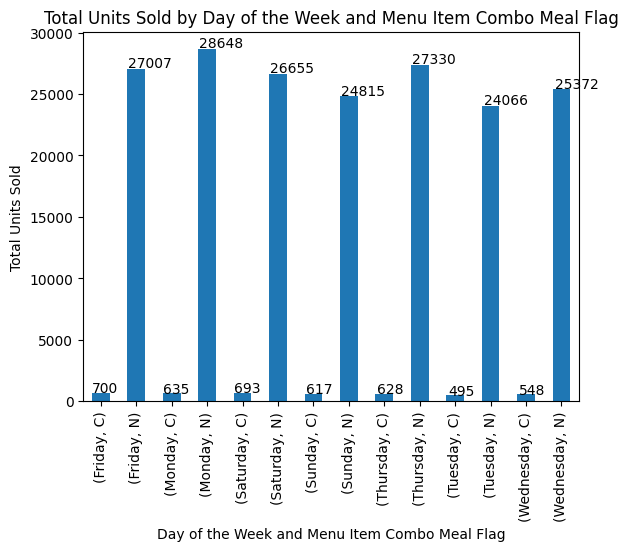

In [24]:
dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday']

# Grouping the data
sales_by_day_combo = product_data_df.groupby(['DayOfWeek', 'Menu Item Combo Meal Flag'])['POS Total Units Sold Promo and Regular'].sum()

# Creating the bar plot
ax = sales_by_day_combo.plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_xlabel('Day of the Week and Menu Item Combo Meal Flag')
ax.set_ylabel('Total Units Sold')
ax.set_title('Total Units Sold by Day of the Week and Menu Item Combo Meal Flag')
plt.show()

In [25]:
sales_by_day_combo

DayOfWeek  Menu Item Combo Meal Flag
Friday     C                              700
           N                            27007
Monday     C                              635
           N                            28648
Saturday   C                              693
           N                            26655
Sunday     C                              617
           N                            24815
Thursday   C                              628
           N                            27330
Tuesday    C                              495
           N                            24066
Wednesday  C                              548
           N                            25372
Name: POS Total Units Sold Promo and Regular, dtype: int64

## Demographics Dataset

In [26]:
demographics_df_raw = pd.read_csv('/content/drive/MyDrive/Analytics/Datasets/demographics_sample.csv')
demographics_df_raw

,Restaurant Key,Restaurant Open Date,Restaurant Close Date,Restaurant Coop,Restaurant Region,AACM,HCM,ACM,Household Count,Urban Uptown,...,Conservative Classics,Cautious Couples,Sustaining Seniors,Prom Soc,Prom Life,Row,Urban,Suburban,Second City,Town and Rural
0,REST_KEY,REST_OPN_DT,REST_CLS_DT,REST_MNT_ADV_COOP,REST_RGN,afr_amr_cons,hisp_cons,asian_cons,HOUSEHLDSC,Soc-U1,...,Life-M2,Life-M3,Life-M4,Prom Soc,Prom Life,Row,PNECY_URB,PNECY_SUB,PNECY_CITY,PNECY_TR
1,1364,2/26/70,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.2,9.67,13.66,"9,080",0%,...,21%,1%,2%,Soc-C2,Life-Y2,"13,055",0%,0%,100%,0%
2,5357,2/6/80,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.24,11.34,42.83,"1,281",10%,...,6%,17%,0%,Soc-S3,Life-Y1,"10,213",13%,87%,0%,0%
3,13369,11/3/95,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,8.91,22.72,19.63,"3,108",0%,...,11%,16%,0%,Soc-S4,Life-F3,"5,748",0%,93%,7%,0%
4,13604,3/8/96,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,3.2,6.28,6.89,"9,219",0%,...,13%,0%,0%,Soc-C1,Life-Y1,"5,652",0%,7%,93%,0%


In [27]:
demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Restaurant Key         5 non-null      object
 1   Restaurant Open Date   5 non-null      object
 2   Restaurant Close Date  1 non-null      object
 3   Restaurant Coop        5 non-null      object
 4   Restaurant Region      5 non-null      object
 5   AACM                   5 non-null      object
 6   HCM                    5 non-null      object
 7   ACM                    5 non-null      object
 8   Household Count        5 non-null      object
 9   Urban Uptown           5 non-null      object
 10  Midtown Mix            5 non-null      object
 11  Urban Core             5 non-null      object
 12  Elite Suburbs          5 non-null      object
 13  The Affluentials       5 non-null      object
 14  Middleburbs            5 non-null      object
 15  Inner Suburbs          5 no

In [28]:
demographics_df_raw.columns

Index(['Restaurant Key', 'Restaurant Open Date', 'Restaurant Close Date',
       'Restaurant Coop', 'Restaurant Region', 'AACM', 'HCM', 'ACM',
       'Household Count', 'Urban Uptown', 'Midtown Mix', 'Urban Core',
       'Elite Suburbs', 'The Affluentials', 'Middleburbs', 'Inner Suburbs',
       'Second City Society', 'City Centers', 'Micro-City Blues',
       'Landed Gentry', 'Country Comfort', 'Middle America', 'Rustic Living',
       'Midlife Success', 'Young Achievers', 'Striving Singles',
       'Accumulated Wealth', 'Young Accumulators', 'Mainstream Families',
       'Sustaining Families', 'Affluent Empty Nests', 'Conservative Classics',
       'Cautious Couples', 'Sustaining Seniors', 'Prom Soc', 'Prom Life',
       'Row', 'Urban', 'Suburban', 'Second City', 'Town and Rural'],
      dtype='object')

All our variables here are **objects**!

Now, lets dive into the unique values:

In [29]:
for column in demographics_df_raw.columns:
    unique_values_2 = demographics_df_raw[column].unique()
    print(f"Unique values in '{column}': {unique_values_2}")
    num_unique_values_2 = len(unique_values_2)
    print(f"Column '{column}' has {num_unique_values_2} unique values: {unique_values_2}\n")

Unique values in 'Restaurant Key': ['REST_KEY' '1364' '5357' '13369' '13604']
Column 'Restaurant Key' has 5 unique values: ['REST_KEY' '1364' '5357' '13369' '13604']

Unique values in 'Restaurant Open Date': ['REST_OPN_DT' '2/26/70' '2/6/80' '11/3/95' '3/8/96']
Column 'Restaurant Open Date' has 5 unique values: ['REST_OPN_DT' '2/26/70' '2/6/80' '11/3/95' '3/8/96']

Unique values in 'Restaurant Close Date': ['REST_CLS_DT' nan]
Column 'Restaurant Close Date' has 2 unique values: ['REST_CLS_DT' nan]

Unique values in 'Restaurant Coop': ['REST_MNT_ADV_COOP' 'SEA/TCA WA CP-0024']
Column 'Restaurant Coop' has 2 unique values: ['REST_MNT_ADV_COOP' 'SEA/TCA WA CP-0024']

Unique values in 'Restaurant Region': ['REST_RGN' 'NORTHWEST REGION-0160480000']
Column 'Restaurant Region' has 2 unique values: ['REST_RGN' 'NORTHWEST REGION-0160480000']

Unique values in 'AACM': ['afr_amr_cons' '9.2' '9.24' '8.91' '3.2']
Column 'AACM' has 5 unique values: ['afr_amr_cons' '9.2' '9.24' '8.91' '3.2']

Unique v

It seems that the row 0 has an internal codification, so every input from this row will be kicked out of the data registrations.

In [30]:
#Reshaping our dataset by dropping row's 0:
demographics_df_raw.columns = demographics_df_raw.iloc[0,:].values
demographics_df_raw.drop(0, axis=0, inplace=True)

In [31]:
demographics_df_raw.columns

Index(['REST_KEY', 'REST_OPN_DT', 'REST_CLS_DT', 'REST_MNT_ADV_COOP',
       'REST_RGN', 'afr_amr_cons', 'hisp_cons', 'asian_cons', 'HOUSEHLDSC',
       'Soc-U1', 'Soc-U2', 'Soc-U3', 'Soc-S1', 'Soc-S2', 'Soc-S3', 'Soc-S4',
       'Soc-C1', 'Soc-C2', 'Soc-C3', 'Soc-T1', 'Soc-T2', 'Soc-T3', 'Soc-T4',
       'Life-Y1', 'Life-Y2', 'Life-Y3', 'Life-F1', 'Life-F2', 'Life-F3',
       'Life-F4', 'Life-M1', 'Life-M2', 'Life-M3', 'Life-M4', 'Prom Soc',
       'Prom Life', 'Row', 'PNECY_URB', 'PNECY_SUB', 'PNECY_CITY', 'PNECY_TR'],
      dtype='object')

In [32]:
rep_vars  = ['afr_amr_cons', 'hisp_cons', 'asian_cons']

for j in rep_vars:

  demographics_df_raw[j] = demographics_df_raw[j].astype('float')

Now, encoding again...

In [33]:
print(demographics_df_raw['REST_KEY'].dtype)
print(demographics_df_raw['REST_KEY'].unique())


object
['1364' '5357' '13369' '13604']


In [34]:
#Encoding the variable 'REST_KEY' for readability and replication:
# Define the mapping dictionary
mapping_dict_2 = {
    1364: 'Store1',
    5357: 'Store2',
    13369: 'Store3',
    13604: 'Store4'
}

# Convert REST_KEY to integer if necessary
demographics_df_raw['REST_KEY'] = demographics_df_raw['REST_KEY'].astype(int)

# Encoding the variable 'REST_KEY'
encoded_rest_key_2 = demographics_df_raw['REST_KEY'].map(mapping_dict_2)

# Check for unmatched values
unmatched_values_2 = demographics_df_raw[~demographics_df_raw['REST_KEY'].isin(mapping_dict_2.keys())]
if not unmatched_values_2.empty:
    print("Unmatched REST_KEY values:")
    print(unmatched_values_2['REST_KEY'].unique())

# Add the encoded column to the DataFrame
demographics_df_raw['Encoded_REST_KEY'] = encoded_rest_key_2

print("Encoded REST_KEY Column:")
print(encoded_rest_key_2)

Encoded REST_KEY Column:
1    Store1
2    Store2
3    Store3
4    Store4
Name: REST_KEY, dtype: object


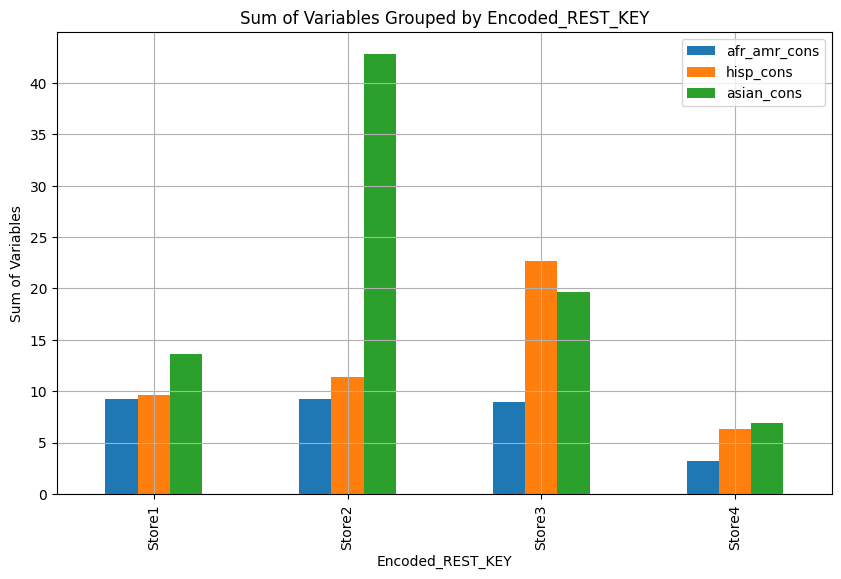

In [35]:
grouped_df_2 = demographics_df_raw[['Encoded_REST_KEY'] + rep_vars].groupby('Encoded_REST_KEY').sum()

# Plot the grouped data as a bar chart
ax = grouped_df_2.plot(kind='bar', figsize=(10, 6))

ax.set_title('Sum of Variables Grouped by Encoded_REST_KEY')
ax.set_xlabel('Encoded_REST_KEY')
ax.set_ylabel('Sum of Variables')
plt.grid(True)
plt.show()

In [36]:
demographics_df_raw

,REST_KEY,REST_OPN_DT,REST_CLS_DT,REST_MNT_ADV_COOP,REST_RGN,afr_amr_cons,hisp_cons,asian_cons,HOUSEHLDSC,Soc-U1,...,Life-M3,Life-M4,Prom Soc,Prom Life,Row,PNECY_URB,PNECY_SUB,PNECY_CITY,PNECY_TR,Encoded_REST_KEY
1,1364,2/26/70,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.20,9.67,13.66,"9,080",0%,...,1%,2%,Soc-C2,Life-Y2,"13,055",0%,0%,100%,0%,Store1
2,5357,2/6/80,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,9.24,11.34,42.83,"1,281",10%,...,17%,0%,Soc-S3,Life-Y1,"10,213",13%,87%,0%,0%,Store2
3,13369,11/3/95,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,8.91,22.72,19.63,"3,108",0%,...,16%,0%,Soc-S4,Life-F3,"5,748",0%,93%,7%,0%,Store3
4,13604,3/8/96,NaN,SEA/TCA WA CP-0024,NORTHWEST REGION-0160480000,3.20,6.28,6.89,"9,219",0%,...,0%,0%,Soc-C1,Life-Y1,"5,652",0%,7%,93%,0%,Store4


We are talking about the **NORTHWEST REGION** of the USA!

In [37]:
cols = ['REST_KEY','Encoded_REST_KEY', 'REST_OPN_DT', 'afr_amr_cons', 'hisp_cons', 'asian_cons','HOUSEHLDSC', 'Soc-U1', 'Soc-S2','Soc-S3', 'Life-F2', 'Life-M3', 'PNECY_URB']

demographics_df_raw[cols]

,REST_KEY,Encoded_REST_KEY,REST_OPN_DT,afr_amr_cons,hisp_cons,asian_cons,HOUSEHLDSC,Soc-U1,Soc-S2,Soc-S3,Life-F2,Life-M3,PNECY_URB
1,1364,Store1,2/26/70,9.20,9.67,13.66,"9,080",0%,0%,0%,1%,1%,0%
2,5357,Store2,2/6/80,9.24,11.34,42.83,"1,281",10%,18%,51%,13%,17%,13%
3,13369,Store3,11/3/95,8.91,22.72,19.63,"3,108",0%,8%,41%,3%,16%,0%
4,13604,Store4,3/8/96,3.20,6.28,6.89,"9,219",0%,3%,1%,1%,0%,0%


## Dayparts Dataset

In [38]:
dayparts_df_raw = pd.read_csv('/content/drive/MyDrive/Analytics/Datasets/dayparts_sample.csv')
dayparts_df_raw

,REST_KEY,Rest Coop,Reporting Day,Daypart Name,Daypart Description,Daypart Sales $,Daypart Transaction Qty
0,1364,SEA/TCA WA CP-0024,1/2/10,After 4PM,4PM - Close,1529.84,235
1,1364,SEA/TCA WA CP-0024,1/2/10,Afternoon,2PM - 4PM,539.20,75
2,1364,SEA/TCA WA CP-0024,1/2/10,Breakfast,Open - 10:30AM (11AM weekend),1027.40,180
3,1364,SEA/TCA WA CP-0024,1/2/10,Dinner,4PM - 9PM,957.24,156
4,1364,SEA/TCA WA CP-0024,1/2/10,Evening,9PM - Close,572.60,79
...,...,...,...,...,...,...,...
2445,13604,SEA/TCA WA CP-0024,1/30/11,Late Night,11PM - 5AM,0.00,0
2446,13604,SEA/TCA WA CP-0024,1/30/11,Lunch,11AM - 2PM,917.64,149
2447,13604,SEA/TCA WA CP-0024,1/30/11,Morning,Open - 11AM,907.15,160
2448,13604,SEA/TCA WA CP-0024,1/30/11,Regular Menu,10:30AM (11AM weekend) - Close,2119.59,327


In [39]:
dayparts_df_raw.columns

Index(['REST_KEY', 'Rest Coop', 'Reporting Day', 'Daypart Name',
       'Daypart Description', 'Daypart Sales $', 'Daypart Transaction Qty'],
      dtype='object')

In [40]:
dayparts_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REST_KEY                 2450 non-null   int64  
 1   Rest Coop                2450 non-null   object 
 2   Reporting Day            2450 non-null   object 
 3   Daypart Name             2450 non-null   object 
 4   Daypart Description      2450 non-null   object 
 5   Daypart Sales $          2450 non-null   float64
 6   Daypart Transaction Qty  2450 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 134.1+ KB


Before making a correct statistical description of our numerical variables, we can just skip the REST_KEY column for this step, so:

In [41]:
#Encoding the variable 'REST_KEY' for readability and replication:
# Define the mapping dictionary
mapping_dict_3 = {
    1364: 'Store1',
    5357: 'Store2',
    13369: 'Store3',
    13604: 'Store4'
}

# Convert REST_KEY to integer if necessary
dayparts_df_raw['REST_KEY'] = dayparts_df_raw['REST_KEY'].astype(int)

# Encoding the variable 'REST_KEY'
encoded_rest_key_3 = dayparts_df_raw['REST_KEY'].map(mapping_dict_3)

# Check for unmatched values
unmatched_values_3 = dayparts_df_raw[dayparts_df_raw['REST_KEY'].isin(mapping_dict_3.keys())]
if not unmatched_values_3.empty:
    print("Unmatched REST_KEY values:")
    print(unmatched_values_3['REST_KEY'].unique())

# Add the encoded column to the DataFrame
dayparts_df_raw['Encoded_REST_KEY'] = encoded_rest_key_3

print("Encoded REST_KEY Column:")
print(encoded_rest_key_3)

Unmatched REST_KEY values:
[ 1364  5357 13369 13604]
Encoded REST_KEY Column:
0       Store1
1       Store1
2       Store1
3       Store1
4       Store1
         ...  
2445    Store4
2446    Store4
2447    Store4
2448    Store4
2449    Store4
Name: REST_KEY, Length: 2450, dtype: object


In [42]:
dayparts_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REST_KEY                 2450 non-null   int64  
 1   Rest Coop                2450 non-null   object 
 2   Reporting Day            2450 non-null   object 
 3   Daypart Name             2450 non-null   object 
 4   Daypart Description      2450 non-null   object 
 5   Daypart Sales $          2450 non-null   float64
 6   Daypart Transaction Qty  2450 non-null   int64  
 7   Encoded_REST_KEY         2450 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 153.2+ KB


In [43]:
dayparts_df = dayparts_df_raw.drop(columns=['REST_KEY', 'Rest Coop' ])

In [44]:
dayparts_df_raw.head()

,REST_KEY,Rest Coop,Reporting Day,Daypart Name,Daypart Description,Daypart Sales $,Daypart Transaction Qty,Encoded_REST_KEY
0,1364,SEA/TCA WA CP-0024,1/2/10,After 4PM,4PM - Close,1529.84,235,Store1
1,1364,SEA/TCA WA CP-0024,1/2/10,Afternoon,2PM - 4PM,539.20,75,Store1
2,1364,SEA/TCA WA CP-0024,1/2/10,Breakfast,Open - 10:30AM (11AM weekend),1027.40,180,Store1
3,1364,SEA/TCA WA CP-0024,1/2/10,Dinner,4PM - 9PM,957.24,156,Store1
4,1364,SEA/TCA WA CP-0024,1/2/10,Evening,9PM - Close,572.60,79,Store1


In [45]:
dayparts_df.describe()

,Daypart Sales $,Daypart Transaction Qty
count,2450.000000,2450.000000
mean,1341.057947,240.541633
std,1251.706218,226.211409
min,0.000000,0.000000
25%,533.152500,94.000000
50%,971.085000,181.000000
75%,1560.737500,292.500000
max,5716.070000,1113.000000


In [46]:
for column in dayparts_df.columns:
    unique_values_3 = dayparts_df[column].unique()
    num_unique_values_3 = len(unique_values_3)
    print(f"Column '{column}' has {num_unique_values_3} unique values: {unique_values_3}\n")

Column 'Reporting Day' has 62 unique values: ['1/2/10' '1/3/10' '1/4/10' '1/5/10' '1/6/10' '1/7/10' '1/8/10' '1/9/10'
 '1/10/10' '1/11/10' '1/12/10' '1/13/10' '1/14/10' '1/15/10' '1/16/10'
 '1/17/10' '1/18/10' '1/19/10' '1/20/10' '1/21/10' '1/22/10' '1/23/10'
 '1/24/10' '1/25/10' '1/26/10' '1/27/10' '1/28/10' '1/29/10' '1/30/10'
 '1/31/10' '2/1/10' '1/1/11' '1/2/11' '1/3/11' '1/4/11' '1/5/11' '1/6/11'
 '1/7/11' '1/8/11' '1/9/11' '1/10/11' '1/11/11' '1/12/11' '1/13/11'
 '1/14/11' '1/15/11' '1/16/11' '1/17/11' '1/18/11' '1/19/11' '1/20/11'
 '1/21/11' '1/22/11' '1/23/11' '1/24/11' '1/25/11' '1/26/11' '1/27/11'
 '1/28/11' '1/29/11' '1/30/11' '1/31/11']

Column 'Daypart Name' has 10 unique values: ['After 4PM' 'Afternoon' 'Breakfast' 'Dinner' 'Evening' 'Late Night'
 'Lunch' 'Morning' 'Regular Menu' 'Total Day']

Column 'Daypart Description' has 10 unique values: ['4PM - Close' '2PM - 4PM' 'Open - 10:30AM (11AM weekend)' '4PM - 9PM'
 '9PM - Close' '11PM - 5AM' '11AM -  2PM' 'Open - 11AM'
 '1

In [47]:
dayparts_df['Reporting Day'] = pd.to_datetime(dayparts_df['Reporting Day'])

<ipython-input-47-e49275d8b636>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dayparts_df['Reporting Day'] = pd.to_datetime(dayparts_df['Reporting Day'])


In [48]:
dayparts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Reporting Day            2450 non-null   datetime64[ns]
 1   Daypart Name             2450 non-null   object        
 2   Daypart Description      2450 non-null   object        
 3   Daypart Sales $          2450 non-null   float64       
 4   Daypart Transaction Qty  2450 non-null   int64         
 5   Encoded_REST_KEY         2450 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 115.0+ KB


**Filter the data:** The dataset dayparts_df contains historial data, so it can be seen that there are months out of the scope of our project interest. So, in this point we need to start by filtering the data for Janurary 2011.

In [49]:
# Filter for January 2011
january_2011_data = dayparts_df[
    (dayparts_df['Reporting Day'] >= '2011-01-01') &
    (dayparts_df['Reporting Day'] < '2011-02-01')
]

And now plotting a box diagram to see variability per each daypart fragment and the respective sales distribution per store:

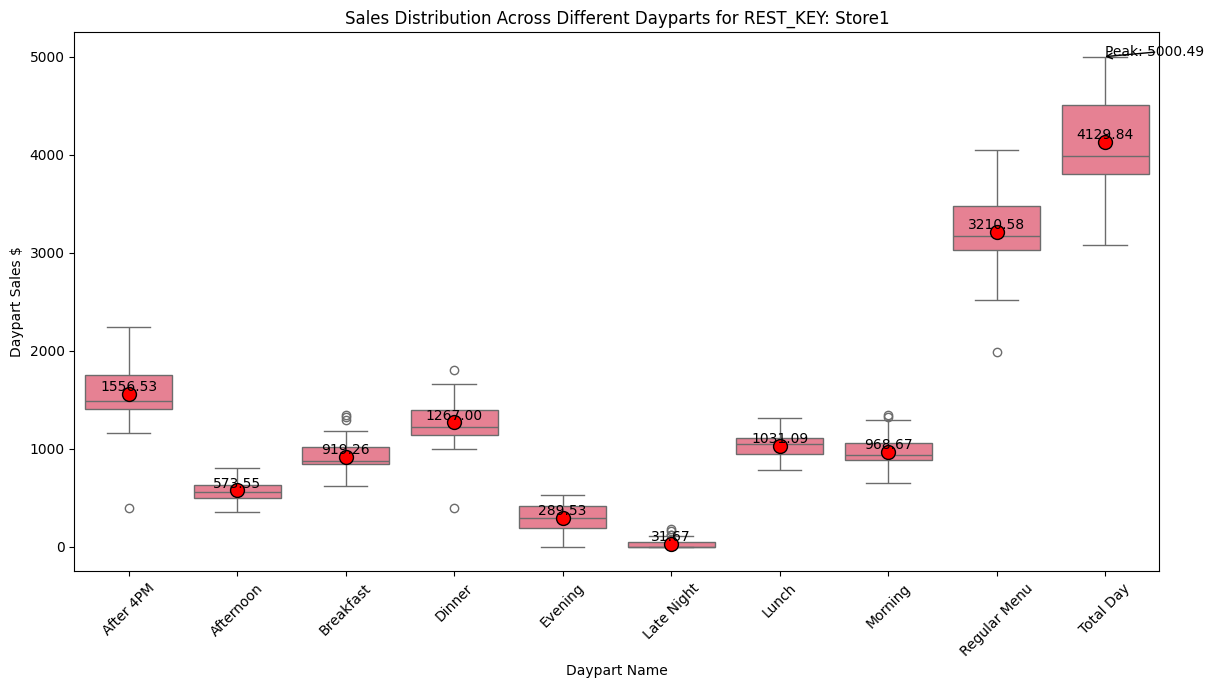

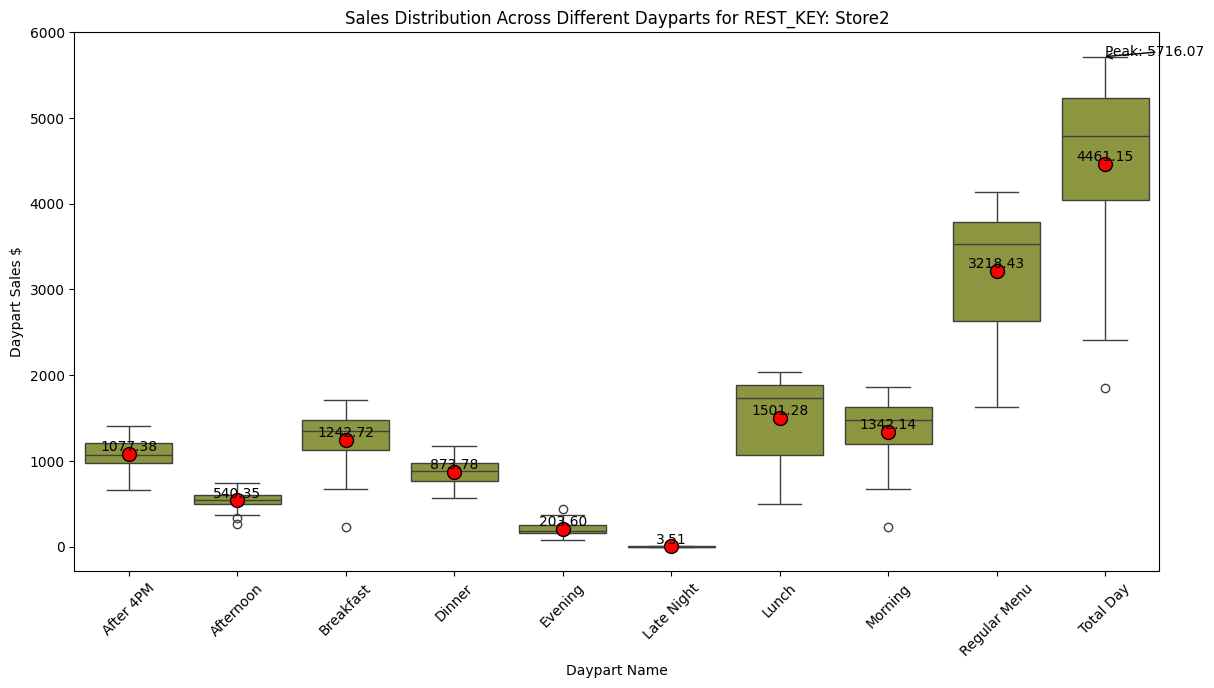

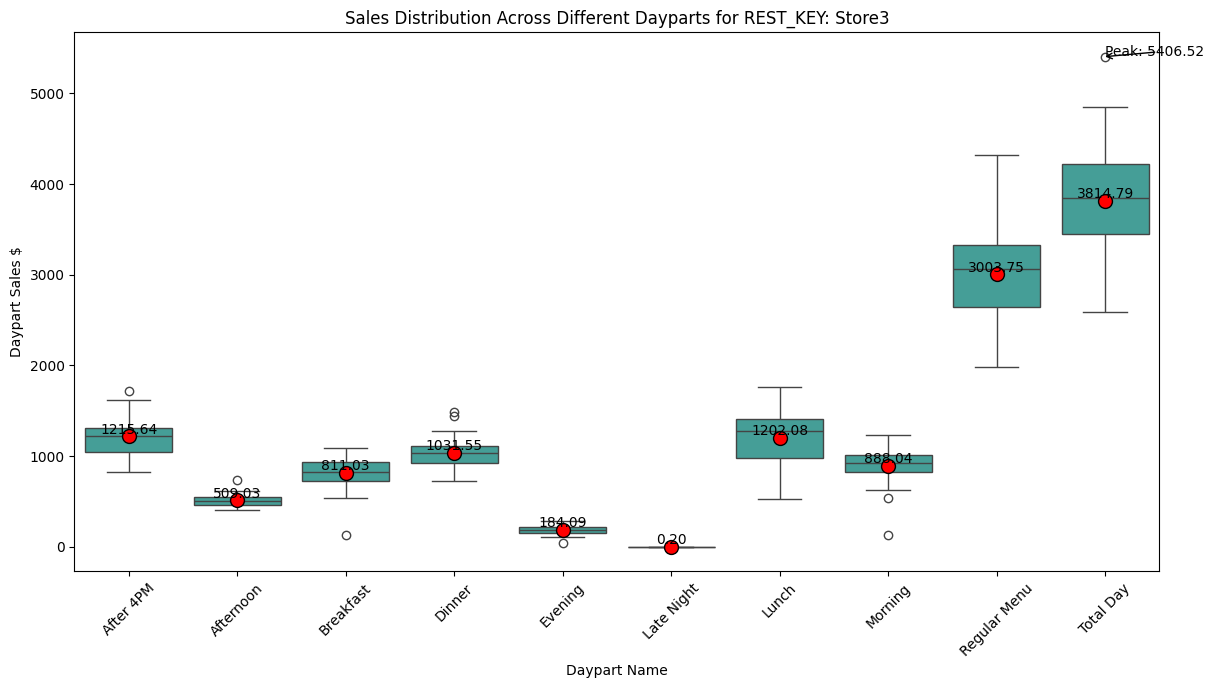

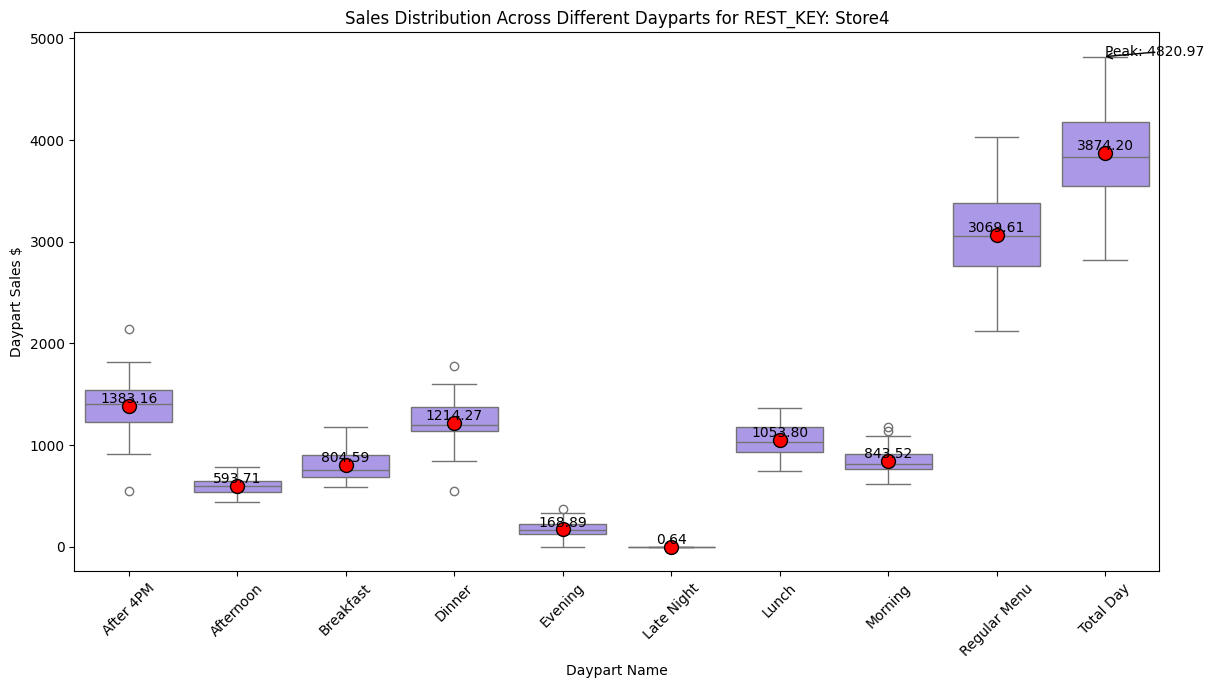

In [50]:
rest_keys = january_2011_data['Encoded_REST_KEY'].unique()
colors = sns.color_palette("husl", len(rest_keys))

# Loop through each store and generate the plots
for i, key in enumerate(rest_keys):
    data_filtered = january_2011_data[january_2011_data['Encoded_REST_KEY'] == key]

    # Plot for Daypart Sales $
    plt.figure(figsize=(14, 7))
    boxplot = sns.boxplot(x='Daypart Name', y='Daypart Sales $', data=data_filtered, showmeans=True,
                          meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"},
                          color=colors[i])
    plt.title(f'Sales Distribution Across Different Dayparts for REST_KEY: {key}')
    plt.xticks(rotation=45)

    # Annotate mean values:
    means = data_filtered.groupby('Daypart Name')['Daypart Sales $'].mean()
    for j, mean in enumerate(means):
        plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='black')

    # Because we are interested in peak values:
    peak_sales_idx = data_filtered['Daypart Sales $'].idxmax()
    peak_sales_value = data_filtered.loc[peak_sales_idx, 'Daypart Sales $']
    peak_sales_daypart = data_filtered.loc[peak_sales_idx, 'Daypart Name']
    plt.annotate(f'Peak: {peak_sales_value:.2f}', xy=(peak_sales_daypart, peak_sales_value), xytext=(peak_sales_daypart, peak_sales_value + 5),
                 arrowprops=dict(facecolor='blue', arrowstyle='->', shrinkA=0, shrinkB=0))
    plt.show()

Now, if we want to evaluate the daily sales and daily transaction quality behaviors per dates (day scale), we should plot a time series plot to see what happens:

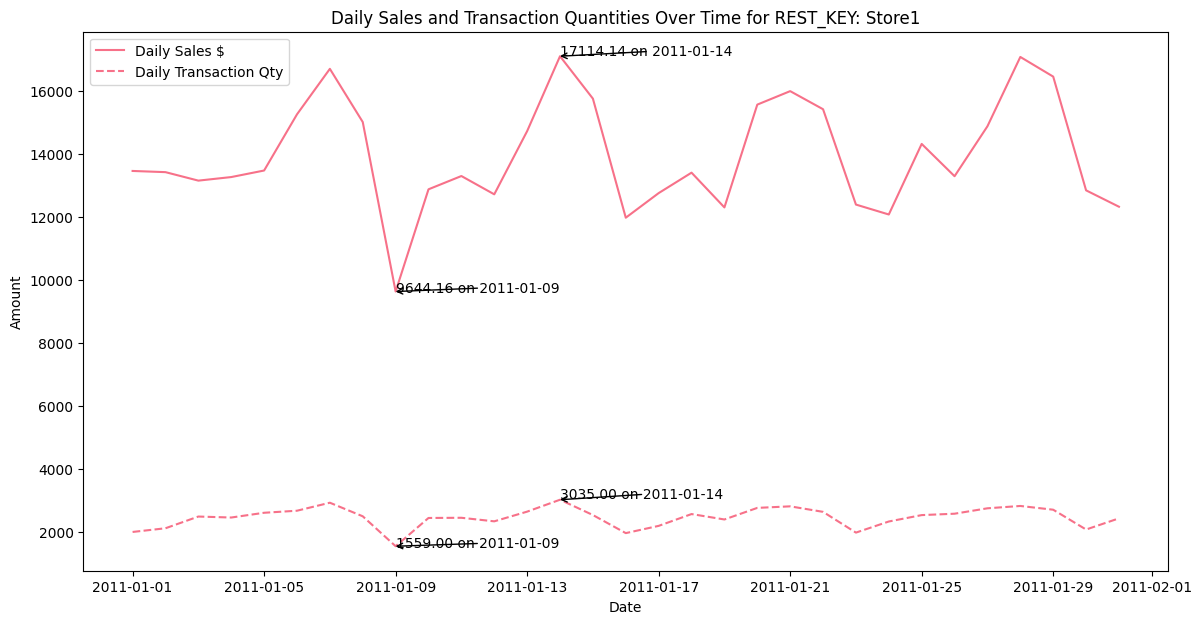

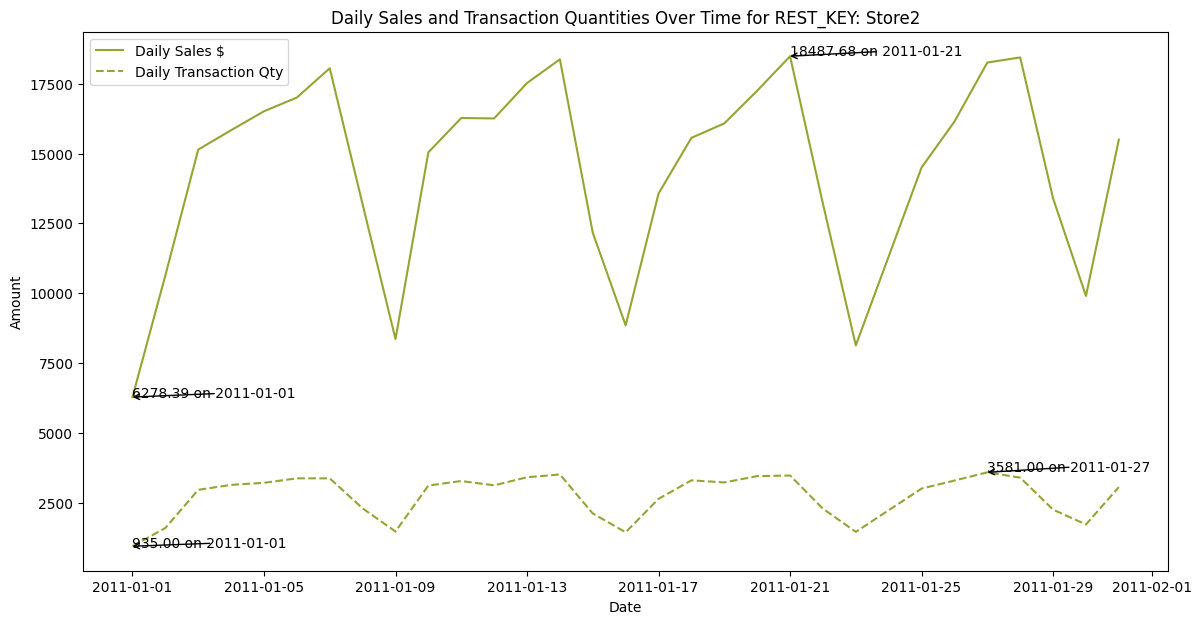

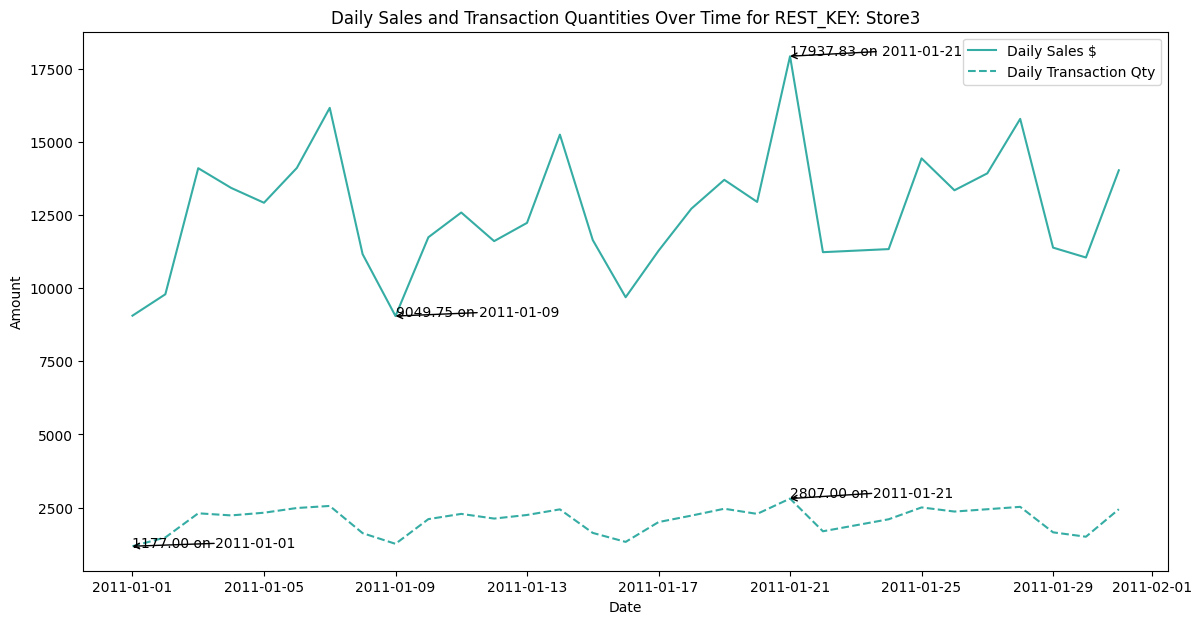

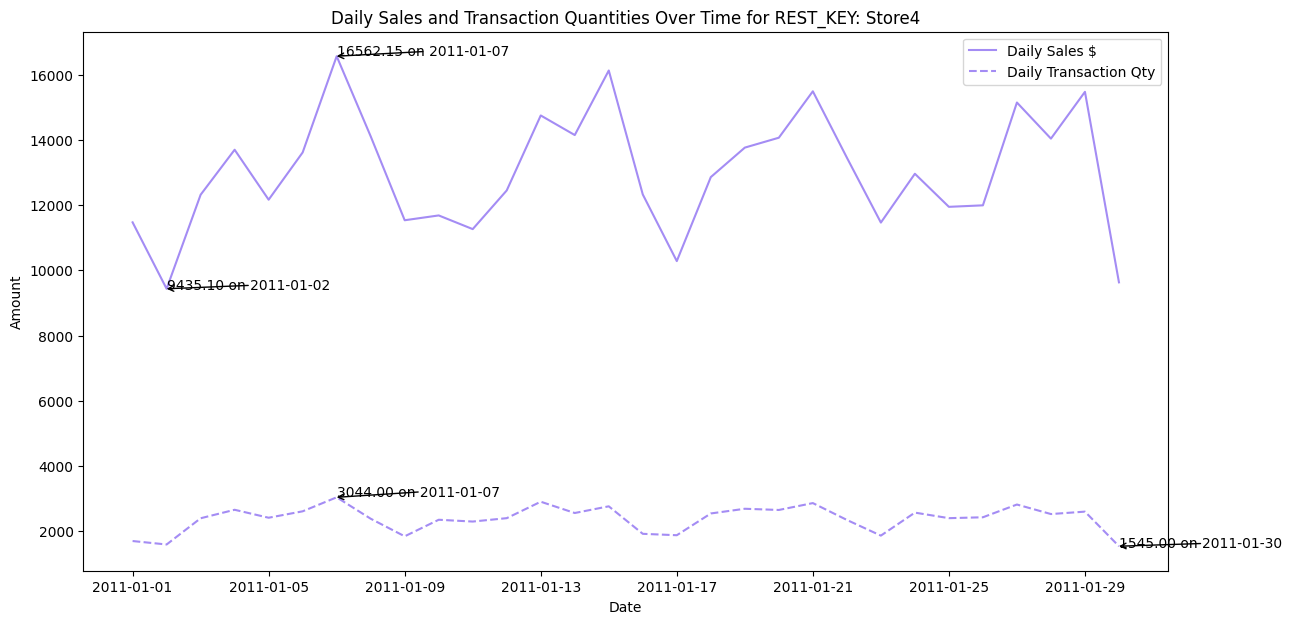

In [51]:
for i, key in enumerate(rest_keys):
    data_filtered = january_2011_data[january_2011_data['Encoded_REST_KEY'] == key]

    # Daily aggregation
    daily_aggregation = data_filtered.groupby('Reporting Day').agg({
        'Daypart Sales $': 'sum',
        'Daypart Transaction Qty': 'sum'
    }).reset_index()

    # Plotting daily sales and transaction quantities
    plt.figure(figsize=(14, 7))
    plt.plot(daily_aggregation['Reporting Day'], daily_aggregation['Daypart Sales $'], label='Daily Sales $', color=colors[i])
    plt.plot(daily_aggregation['Reporting Day'], daily_aggregation['Daypart Transaction Qty'], label='Daily Transaction Qty', linestyle='--', color=colors[i])
    plt.title(f'Daily Sales and Transaction Quantities Over Time for REST_KEY: {key}')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()

    # Annotate peak values for daily sales
    peak_sales_idx = daily_aggregation['Daypart Sales $'].idxmax()
    peak_sales_value = daily_aggregation['Daypart Sales $'].max()
    peak_sales_date = daily_aggregation['Reporting Day'].iloc[peak_sales_idx]
    plt.annotate(f'{peak_sales_value:.2f} on {peak_sales_date.date()}', xy=(peak_sales_date, peak_sales_value), xytext=(peak_sales_date, peak_sales_value + 20),
                 arrowprops=dict(facecolor='blue', arrowstyle='->', shrinkA=0, shrinkB=0))

    # Annotate lowest values for daily sales
    low_sales_idx = daily_aggregation['Daypart Sales $'].idxmin()
    low_sales_value = daily_aggregation['Daypart Sales $'].min()
    low_sales_date = daily_aggregation['Reporting Day'].iloc[low_sales_idx]
    plt.annotate(f'{low_sales_value:.2f} on {low_sales_date.date()}', xy=(low_sales_date, low_sales_value), xytext=(low_sales_date, low_sales_value - 20),
                 arrowprops=dict(facecolor='red', arrowstyle='->', shrinkA=0, shrinkB=0))

    # Annotate peak values for daily transaction quantity
    peak_trans_idx = daily_aggregation['Daypart Transaction Qty'].idxmax()
    peak_trans_value = daily_aggregation['Daypart Transaction Qty'].max()
    peak_trans_date = daily_aggregation['Reporting Day'].iloc[peak_trans_idx]
    plt.annotate(f'{peak_trans_value:.2f} on {peak_trans_date.date()}', xy=(peak_trans_date, peak_trans_value), xytext=(peak_trans_date, peak_trans_value + 40),
                 arrowprops=dict(facecolor='blue', arrowstyle='->', shrinkA=0, shrinkB=0))

    # Annotate lowest values for daily transaction quantity
    low_trans_idx = daily_aggregation['Daypart Transaction Qty'].idxmin()
    low_trans_value = daily_aggregation['Daypart Transaction Qty'].min()
    low_trans_date = daily_aggregation['Reporting Day'].iloc[low_trans_idx]
    plt.annotate(f'{low_trans_value:.2f} on {low_trans_date.date()}', xy=(low_trans_date, low_trans_value), xytext=(low_trans_date, low_trans_value - 40),
                 arrowprops=dict(facecolor='red', arrowstyle='->', shrinkA=0, shrinkB=0))

    plt.show()


Finally, we can intuit some relationship between daily sales and quantity of transactions, so we can evaluate their correlation:

In [52]:
# Calculate the correlation between sales and transaction quantities
correlation_matrix = dayparts_df[['Daypart Sales $', 'Daypart Transaction Qty']].corr()

correlation_matrix

,Daypart Sales $,Daypart Transaction Qty
Daypart Sales $,1.000000,0.985519
Daypart Transaction Qty,0.985519,1.000000


## Weather Dataset

In [53]:
weather_df_raw = pd.read_csv('/content/drive/MyDrive/Analytics/Datasets/weather_sample.csv')
weather_df_raw

,xFilter,xError,FINAL_EXEC_FLAG,LEVEL,GEO_CODE,GEO_NAME,Unnamed: 6,TY_DATE,LY_DATE,TY_MODEL,...,monthyr,tychg,lychg,impactty,impactly,tycompwoweather,compduetoweather,Datafile,_CreateDt,_CreateBy
0,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/1/2011,1/2/2010,0.734563,...,12011,-0.033796,-0.002856,-29.304737,-2.961223,-0.112490,-0.032841,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
1,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/2/2011,1/3/2010,0.926226,...,12011,-0.034360,0.001469,-26.840637,0.000000,0.090896,-0.039571,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
2,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/3/2011,1/4/2010,0.985524,...,12011,-0.017850,-0.014041,0.000000,-13.422736,0.045426,0.016294,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
3,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/4/2011,1/5/2010,0.933113,...,12011,-0.035661,0.010197,-37.284376,10.154763,0.101046,-0.055170,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
4,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/5/2011,1/6/2010,0.959838,...,12011,-0.007844,0.014668,-8.608456,14.923095,0.071471,-0.027328,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
5,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/6/2011,1/7/2010,0.966545,...,12011,0.001152,0.000642,1.281989,0.668299,0.031854,0.000000,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
6,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/7/2011,1/8/2010,0.942272,...,12011,-0.013016,-0.023519,-16.043325,-27.168455,0.038942,0.013147,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
7,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/8/2011,1/9/2010,0.938513,...,12011,-0.030894,0.020614,-33.724571,21.389807,0.025843,-0.080667,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
8,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/9/2011,1/10/2010,0.915395,...,12011,-0.042685,0.023958,-35.142600,19.069350,0.074452,-0.083378,weather.weatherhist_coop,23FEB11:13:49:58,jbrown
9,,,Y,COOP,24,SEA/TCA WA CP-0024,NaN,1/10/2011,1/11/2010,0.914245,...,12011,-0.043299,0.001312,-42.538017,1.256595,0.111167,-0.055295,weather.weatherhist_coop,23FEB11:13:49:58,jbrown


In [54]:
weather_df_raw.columns

Index(['xFilter', 'xError', 'FINAL_EXEC_FLAG', 'LEVEL', 'GEO_CODE', 'GEO_NAME',
       'Unnamed: 6', 'TY_DATE', 'LY_DATE', 'TY_MODEL', 'TY_NON_WX_MODEL',
       'TY_SIG_TEMP_NEG_PCT', 'TY_SIG_TEMP_POS_PCT', 'TY_SIG_RAIN_PCT',
       'TY_SIG_SNOW_PCT', 'TY_SIG_SNOW_AND_RAIN_PCT', 'TY_NULL_FORECAST',
       'TY_MISSING_TEMP', 'TY_MISSING_PRECIP', 'LY_MODEL', 'LY_NON_WX_MODEL',
       'LY_SIG_TEMP_NEG_PCT', 'LY_SIG_TEMP_POS_PCT', 'LY_SIG_RAIN_PCT',
       'LY_SIG_SNOW_PCT', 'LY_SIG_SNOW_AND_RAIN_PCT', 'LY_NULL_FORECAST',
       'LY_MISSING_TEMP', 'LY_MISSING_PRECIP', 'TY_AVG_MIN_TEMP',
       'TY_AVG_MAX_TEMP', 'TY_TOTAL_PRECIP', 'TY_TOTAL_SNOW',
       'LY_AVG_MIN_TEMP', 'LY_AVG_MAX_TEMP', 'LY_TOTAL_PRECIP',
       'LY_TOTAL_SNOW', 'NRM_AVG_MIN_TEMP', 'NRM_AVG_MAX_TEMP',
       'NRM_TOTAL_PRECIP', 'NRM_TOTAL_SNOW', 'tytrn', 'lytrn', 'comp',
       'tybase', 'lybase', 'reasoncode', 'monthyr', 'tychg', 'lychg',
       'impactty', 'impactly', 'tycompwoweather', 'compduetoweather',
       'D

In [55]:
weather_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   xFilter                   31 non-null     object 
 1   xError                    31 non-null     object 
 2   FINAL_EXEC_FLAG           31 non-null     object 
 3   LEVEL                     31 non-null     object 
 4   GEO_CODE                  31 non-null     int64  
 5   GEO_NAME                  31 non-null     object 
 6   Unnamed: 6                0 non-null      float64
 7   TY_DATE                   31 non-null     object 
 8   LY_DATE                   31 non-null     object 
 9   TY_MODEL                  31 non-null     float64
 10  TY_NON_WX_MODEL           31 non-null     float64
 11  TY_SIG_TEMP_NEG_PCT       31 non-null     int64  
 12  TY_SIG_TEMP_POS_PCT       31 non-null     int64  
 13  TY_SIG_RAIN_PCT           31 non-null     int64  
 14  TY_SIG_SNOW_

Making our typical statistical assessment:

In [56]:
weather_df_raw.describe()

,GEO_CODE,Unnamed: 6,TY_MODEL,TY_NON_WX_MODEL,TY_SIG_TEMP_NEG_PCT,TY_SIG_TEMP_POS_PCT,TY_SIG_RAIN_PCT,TY_SIG_SNOW_PCT,TY_SIG_SNOW_AND_RAIN_PCT,TY_NULL_FORECAST,...,comp,tybase,lybase,monthyr,tychg,lychg,impactty,impactly,tycompwoweather,compduetoweather
count,31.0,0.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.0,...,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,24.0,NaN,0.950923,0.958288,5.032258,5.193548,23.774194,0.0,0.0,0.0,...,0.009167,989.826360,995.127928,12011.0,-0.007365,0.013770,-6.169994,10.720275,0.030825,-0.021664
std,0.0,NaN,0.045907,0.036813,17.079196,18.524613,38.774313,0.0,0.0,0.0,...,0.039997,117.208116,102.833722,0.0,0.022624,0.018376,20.536063,18.357782,0.046627,0.034863
min,24.0,NaN,0.734563,0.768359,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,-0.145332,776.721093,790.496175,12011.0,-0.043299,-0.023519,-42.538017,-27.168455,-0.112490,-0.096705
25%,24.0,NaN,0.940392,0.956086,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,-0.009613,957.117896,958.685519,12011.0,-0.022333,0.001518,-21.634003,0.000000,0.007583,-0.050852
50%,24.0,NaN,0.955646,0.968256,0.000000,0.000000,2.000000,0.0,0.0,0.0,...,0.010639,1006.764372,1017.215301,12011.0,-0.013016,0.010495,0.000000,7.025901,0.031854,-0.007380
75%,24.0,NaN,0.977804,0.969348,0.000000,0.000000,25.000000,0.0,0.0,0.0,...,0.038171,1046.167322,1042.481148,12011.0,0.010048,0.025377,0.336523,21.080564,0.060936,0.000000
max,24.0,NaN,1.003308,1.003374,71.000000,98.000000,99.000000,0.0,0.0,0.0,...,0.061720,1232.584863,1160.393989,12011.0,0.034593,0.052449,37.615447,50.902054,0.114183,0.039132


  Does this information have sense?  

  **NO!**

  The data in this dataset looks like a presentation of statistics according to weather features. Also, we can see that we are talking about the same region, which can be seen in GEO_CODE and our typical 'SEA/TCA WA CP-0024'

In [57]:
#What about the nulls?
print(weather_df_raw.isnull().sum())

xFilter                      0
xError                       0
FINAL_EXEC_FLAG              0
LEVEL                        0
GEO_CODE                     0
GEO_NAME                     0
Unnamed: 6                  31
TY_DATE                      0
LY_DATE                      0
TY_MODEL                     0
TY_NON_WX_MODEL              0
TY_SIG_TEMP_NEG_PCT          0
TY_SIG_TEMP_POS_PCT          0
TY_SIG_RAIN_PCT              0
TY_SIG_SNOW_PCT              0
TY_SIG_SNOW_AND_RAIN_PCT     0
TY_NULL_FORECAST             0
TY_MISSING_TEMP              0
TY_MISSING_PRECIP            0
LY_MODEL                     0
LY_NON_WX_MODEL              0
LY_SIG_TEMP_NEG_PCT          0
LY_SIG_TEMP_POS_PCT          0
LY_SIG_RAIN_PCT              0
LY_SIG_SNOW_PCT              0
LY_SIG_SNOW_AND_RAIN_PCT     0
LY_NULL_FORECAST             0
LY_MISSING_TEMP              0
LY_MISSING_PRECIP            0
TY_AVG_MIN_TEMP              0
TY_AVG_MAX_TEMP              0
TY_TOTAL_PRECIP              0
TY_TOTAL

In [58]:
for column in weather_df_raw.columns:
    unique_values_4 = weather_df_raw[column].unique()
    num_unique_values_4 = len(unique_values_4)
    print(f"Column '{column}' has {num_unique_values_4} unique values: {unique_values_4}\n")

Column 'xFilter' has 1 unique values: [' ']

Column 'xError' has 1 unique values: [' ']

Column 'FINAL_EXEC_FLAG' has 1 unique values: ['Y']

Column 'LEVEL' has 1 unique values: ['COOP']

Column 'GEO_CODE' has 1 unique values: [24]

Column 'GEO_NAME' has 1 unique values: ['SEA/TCA WA CP-0024']

Column 'Unnamed: 6' has 1 unique values: [nan]

Column 'TY_DATE' has 31 unique values: ['1/1/2011' '1/2/2011' '1/3/2011' '1/4/2011' '1/5/2011' '1/6/2011'
 '1/7/2011' '1/8/2011' '1/9/2011' '1/10/2011' '1/11/2011' '1/12/2011'
 '1/13/2011' '1/14/2011' '1/15/2011' '1/16/2011' '1/17/2011' '1/18/2011'
 '1/19/2011' '1/20/2011' '1/21/2011' '1/22/2011' '1/23/2011' '1/24/2011'
 '1/25/2011' '1/26/2011' '1/27/2011' '1/28/2011' '1/29/2011' '1/30/2011'
 '1/31/2011']

Column 'LY_DATE' has 31 unique values: ['1/2/2010' '1/3/2010' '1/4/2010' '1/5/2010' '1/6/2010' '1/7/2010'
 '1/8/2010' '1/9/2010' '1/10/2010' '1/11/2010' '1/12/2010' '1/13/2010'
 '1/14/2010' '1/15/2010' '1/16/2010' '1/17/2010' '1/18/2010' '1/19/20

So, excluding the unique columns to make a easier exploration:

In [59]:
weather_df = weather_df_raw.drop(columns=['xFilter', 'xError', 'FINAL_EXEC_FLAG', 'LEVEL', 'GEO_CODE', 'GEO_NAME', 'Unnamed: 6', 'TY_SIG_SNOW_PCT', 'TY_SIG_SNOW_AND_RAIN_PCT', 'TY_NULL_FORECAST', 'LY_MISSING_TEMP', 'TY_MISSING_PRECIP', 'monthyr', 'Datafile', '_CreateDt', '_CreateBy' ])

In [60]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TY_DATE                   31 non-null     object 
 1   LY_DATE                   31 non-null     object 
 2   TY_MODEL                  31 non-null     float64
 3   TY_NON_WX_MODEL           31 non-null     float64
 4   TY_SIG_TEMP_NEG_PCT       31 non-null     int64  
 5   TY_SIG_TEMP_POS_PCT       31 non-null     int64  
 6   TY_SIG_RAIN_PCT           31 non-null     int64  
 7   TY_MISSING_TEMP           31 non-null     int64  
 8   LY_MODEL                  31 non-null     float64
 9   LY_NON_WX_MODEL           31 non-null     float64
 10  LY_SIG_TEMP_NEG_PCT       31 non-null     int64  
 11  LY_SIG_TEMP_POS_PCT       31 non-null     int64  
 12  LY_SIG_RAIN_PCT           31 non-null     int64  
 13  LY_SIG_SNOW_PCT           31 non-null     int64  
 14  LY_SIG_SNOW_

Now, if we want to look deeper in our numerical variables, and see possible correlations, we can address this by doing a correlation matrix:

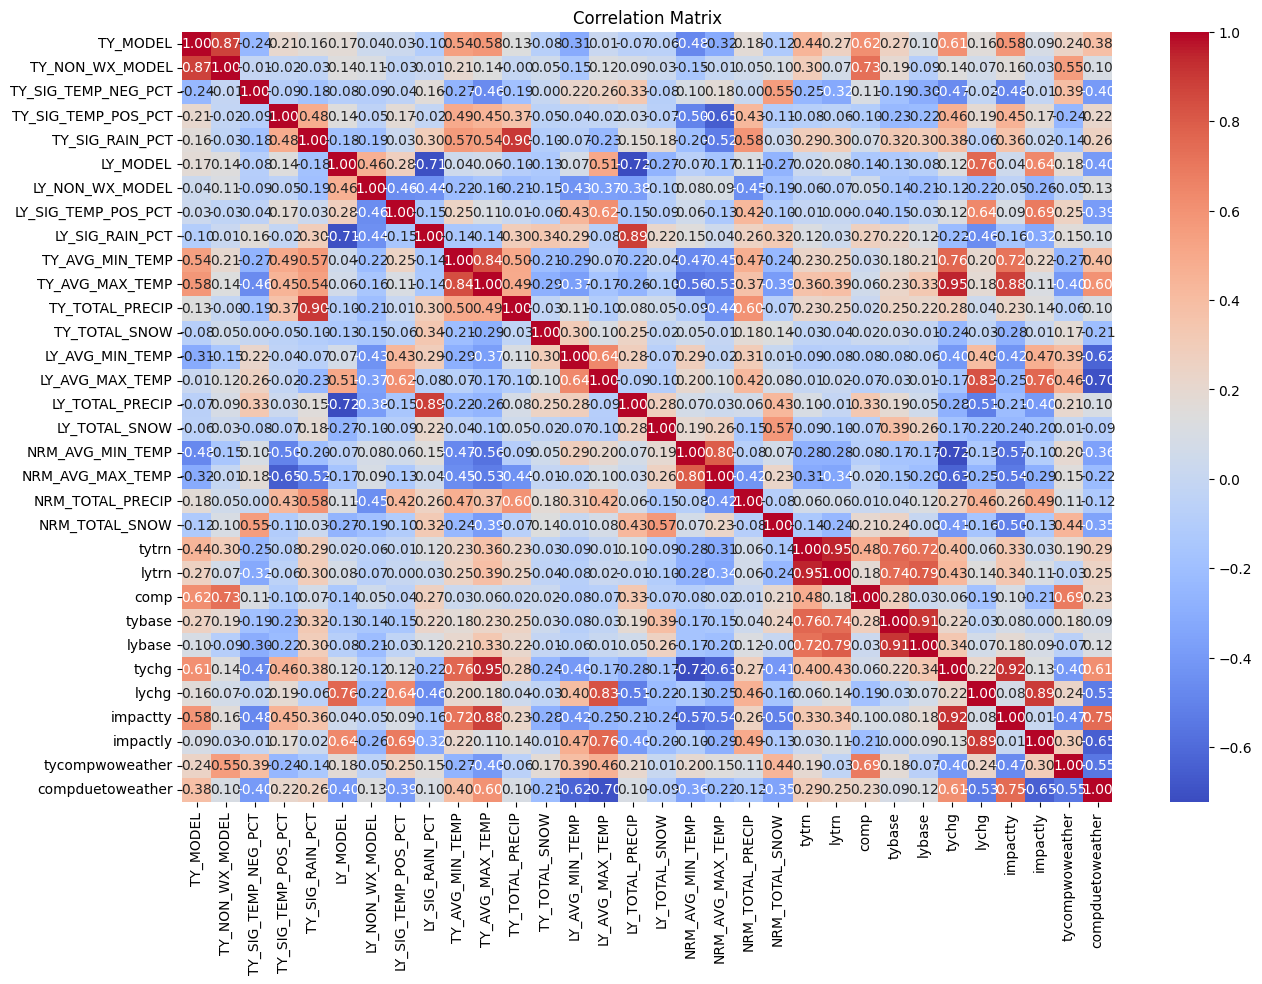

In [61]:
# Select only numeric columns for correlation analysis
numeric_columns = weather_df.select_dtypes(include=['float64', 'int64'])

# Drop columns with all NaN values
numeric_columns = numeric_columns.dropna(axis=1, how='all')

# Drop columns with all zero values
numeric_columns = numeric_columns.loc[:, (numeric_columns != 0).any(axis=0)]

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

This looks a bit confused! However, if we inspect our datafram,e we can see there are two columns which can be related as datetime format:

In [62]:
#Ensuring datetime format for both variables:
weather_df['TY_DATE'] = pd.to_datetime(weather_df['TY_DATE'])
weather_df['LY_DATE'] = pd.to_datetime(weather_df['LY_DATE'])

In [63]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TY_DATE                   31 non-null     datetime64[ns]
 1   LY_DATE                   31 non-null     datetime64[ns]
 2   TY_MODEL                  31 non-null     float64       
 3   TY_NON_WX_MODEL           31 non-null     float64       
 4   TY_SIG_TEMP_NEG_PCT       31 non-null     int64         
 5   TY_SIG_TEMP_POS_PCT       31 non-null     int64         
 6   TY_SIG_RAIN_PCT           31 non-null     int64         
 7   TY_MISSING_TEMP           31 non-null     int64         
 8   LY_MODEL                  31 non-null     float64       
 9   LY_NON_WX_MODEL           31 non-null     float64       
 10  LY_SIG_TEMP_NEG_PCT       31 non-null     int64         
 11  LY_SIG_TEMP_POS_PCT       31 non-null     int64         
 12  LY_SIG_RAIN_PCT         

Now that we have 2 dates, TY_DATE and LY_DATE we could think about possible variables related to these variables: TY_DATE(Date in the current year) and LT_DATE (Date in the last year).

So, inspecting the dataset, we can find that there two variables: TY_MODEL and LY_MODEL, which represent the current year model value and last year model value, respectively.

But... What does it mean?

These variables represent the probability to predict the weather in any day with some accuracy.

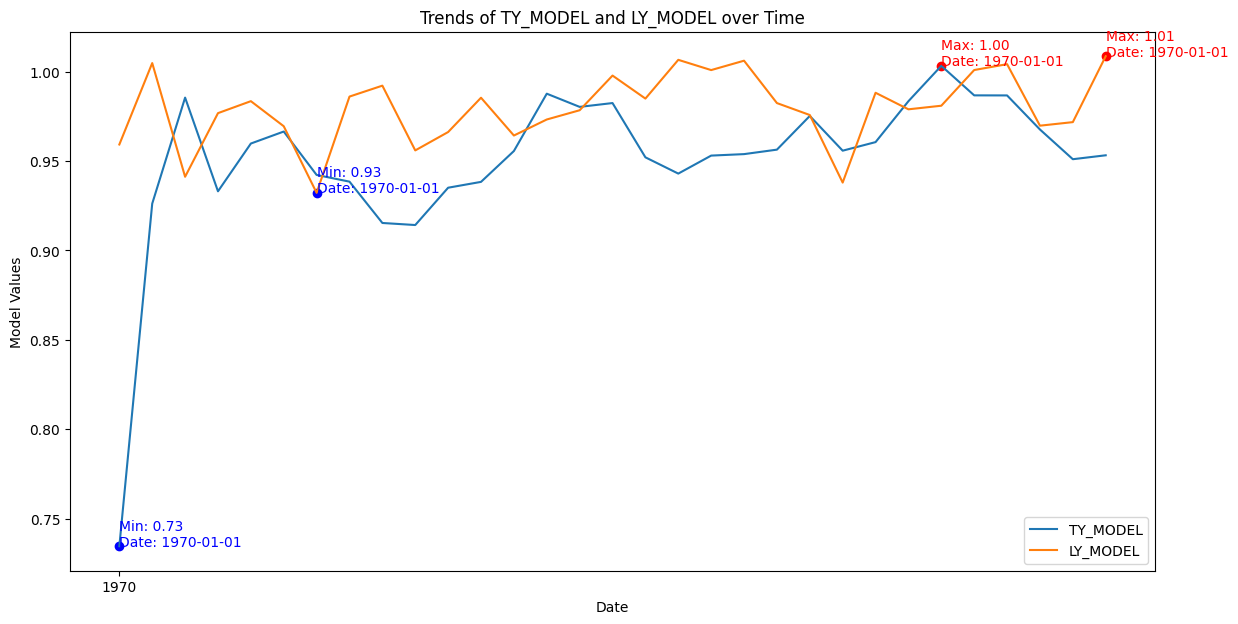

In [64]:
#Then, evaluate both models according to the dates we have just adjusted!
weather_df.index = pd.to_datetime(weather_df.index)
# Find the peak values and corresponding dates for TY_MODEL and LY_MODEL
ty_model_max = weather_df['TY_MODEL'].max()
ty_model_min = weather_df['TY_MODEL'].min()
ty_model_max_date = weather_df['TY_MODEL'].idxmax()
ty_model_min_date = weather_df['TY_MODEL'].idxmin()
ly_model_max = weather_df['LY_MODEL'].max()
ly_model_min = weather_df['LY_MODEL'].min()
ly_model_max_date = weather_df['LY_MODEL'].idxmax()
ly_model_min_date = weather_df['LY_MODEL'].idxmin()

# Plotting the trend of both models over time
plt.figure(figsize=(14, 7))
plt.plot(weather_df.index, weather_df['TY_MODEL'], label='TY_MODEL')
plt.plot(weather_df.index, weather_df['LY_MODEL'], label='LY_MODEL')
plt.scatter(ty_model_max_date, ty_model_max, color='red')
plt.scatter(ty_model_min_date, ty_model_min, color='blue')
plt.scatter(ly_model_max_date, ly_model_max, color='red')
plt.scatter(ly_model_min_date, ly_model_min, color='blue')
plt.text(ty_model_max_date, ty_model_max, f'Max: {ty_model_max:.2f}\nDate: {ty_model_max_date.date()}', color='red')
plt.text(ty_model_min_date, ty_model_min, f'Min: {ty_model_min:.2f}\nDate: {ty_model_min_date.date()}', color='blue')
plt.text(ly_model_max_date, ly_model_max, f'Max: {ly_model_max:.2f}\nDate: {ly_model_max_date.date()}', color='red')
plt.text(ly_model_min_date, ly_model_min, f'Min: {ly_model_min:.2f}\nDate: {ly_model_min_date.date()}', color='blue')
plt.xlabel('Date')
plt.ylabel('Model Values')
plt.title('Trends of TY_MODEL and LY_MODEL over Time')
plt.legend()
plt.show()

This seems pretty interesting... Looks like the Last Year model showed a better performance than the current year model... Maybe there is a high variability in this last model.

Let's see the behavior through a boxplot diagram:

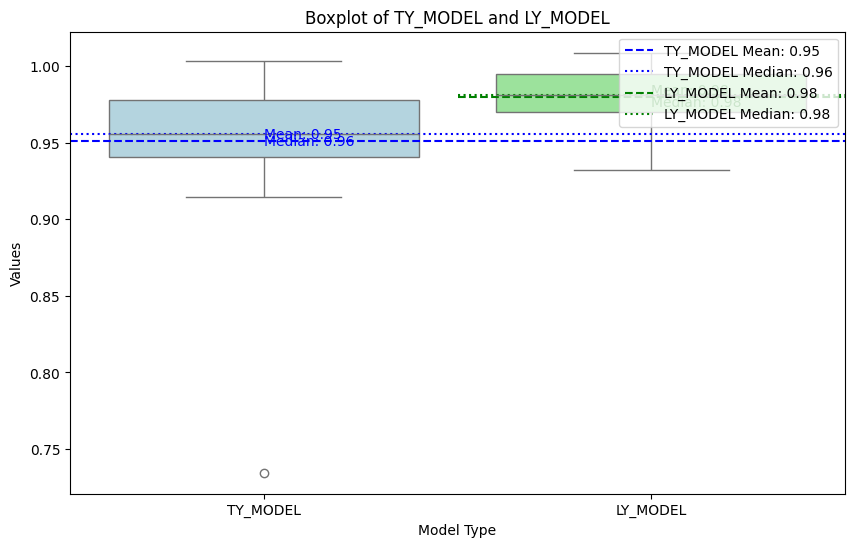

In [65]:
# Define central tendency measures for TY_MODEL and LY_MODEL
ty_model_mean = weather_df['TY_MODEL'].mean()
ty_model_median = weather_df['TY_MODEL'].median()

ly_model_mean = weather_df['LY_MODEL'].mean()
ly_model_median = weather_df['LY_MODEL'].median()

plt.figure(figsize=(10, 6))

# Differentiating TY_MODEL and LY_MODEL
sns.boxplot(data=weather_df[['TY_MODEL', 'LY_MODEL']], palette=['lightblue', 'lightgreen'])

# Adding the central tendency measures
plt.axhline(ty_model_mean, color='blue', linestyle='--', label=f'TY_MODEL Mean: {ty_model_mean:.2f}')
plt.axhline(ty_model_median, color='blue', linestyle=':', label=f'TY_MODEL Median: {ty_model_median:.2f}')
plt.axhline(ly_model_mean, color='green', linestyle='--', xmin=0.5, xmax=1.5, label=f'LY_MODEL Mean: {ly_model_mean:.2f}')
plt.axhline(ly_model_median, color='green', linestyle=':', xmin=0.5, xmax=1.5, label=f'LY_MODEL Median: {ly_model_median:.2f}')
plt.text(0, ty_model_mean, f'Mean: {ty_model_mean:.2f}', color='blue', ha='left', va='bottom')
plt.text(0, ty_model_median, f'Median: {ty_model_median:.2f}', color='blue', ha='left', va='top')
plt.text(1, ly_model_mean, f'Mean: {ly_model_mean:.2f}', color='green', ha='left', va='bottom')
plt.text(1, ly_model_median, f'Median: {ly_model_median:.2f}', color='green', ha='left', va='top')

# Plotting
plt.title('Boxplot of TY_MODEL and LY_MODEL')
plt.xlabel('Model Type')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.show()